# Experiment analysis

In [1]:
import pandas as pd
import numpy as np
from functools import reduce
#import seaborn as sns
%matplotlib inline

In [466]:
#80_30_0 means 
#80=amount of aicrafts at peak times
#30=percentage of bulk
#0=percentage no show


alternative="180710_80bulk30_show30_extra5_prio2"
nr_replications=160
dic80_30_30={}
dic80_30_0={}
dic80_0_30={}
dic80_0_0={}
# dic60_30_30={}
# dic60_30_0={}
# dic60_0_30={}
# dic60_0_0={}
for i in range(1,nr_replications+1):
    j=str(i)
    dic_key="rep"+j
    dic80_30_30[dic_key]=pd.read_excel("model_output_basicmodel_80bulk30_show30_extra5+prio2_Rep"+j+".xlsx")
    dic80_30_0[dic_key]=pd.read_excel("model_output_basicmodel_80bulk30_show0_extra5+prio2_Rep"+j+".xlsx")
    dic80_0_30[dic_key]=pd.read_excel("model_output_basicmodel_80bulk0_show30_extra5+prio2_Rep"+j+".xlsx")
    dic80_0_0[dic_key]=pd.read_excel("model_output_basicmodel_80bulk0_show0_extra5+prio2_Rep"+j+".xlsx")
#     dic60_30_30[dic_key]=pd.read_excel("model_output_basicmodel_60bulk30_show30_Rep"+j+".xlsx")
#     dic60_30_0[dic_key]=pd.read_excel("model_output_basicmodel_60bulk30_show0_Rep"+j+".xlsx")
#     dic60_0_30[dic_key]=pd.read_excel("model_output_basicmodel_60bulk0_show30_Rep"+j+".xlsx")
#     dic60_0_0[dic_key]=pd.read_excel("model_output_basicmodel_60bulk0_show0_Rep"+j+".xlsx")

In [467]:
#dic_all={"dic80_30_30":dic80_30_30, "dic80_30_0": dic80_30_0} #, "dic80_0_30": dic80_0_30, "dic80_0_0": dic80_0_0}
dic_all={"dic80_30_30":dic80_30_30, "dic80_30_0": dic80_30_0, "dic80_0_30": dic80_0_30, "dic80_0_0": dic80_0_0} #normal graph
#dic_all={"dic80_30_30":dic80_30_30, "dic80_30_0": dic80_30_0, "dic80_0_30": dic80_0_30}#, "dic80_0_0": dic80_0_0} #60-80-100 input
#dic_all={"dic80_30_30":dic60_30_30, "dic80_30_0": dic60_30_0, "dic80_0_30": dic60_0_30, "dic80_0_0": dic60_0_0} 60 input

In [468]:
dic_final={}
for key, values in dic_all.items():
    df_concat=pd.concat(values.values())
    by_row_index=df_concat.groupby(df_concat.index)
    df_means=by_row_index.mean()
    dic_final[key]=df_means
    column_list=[]
    for i in dic_final[key].columns:
        j=i+"_"+key
        column_list.append(j)
    dic_final[key].columns=column_list

In [469]:
dfs=[]
for key, values in dic_final.items():
    dfs.append(values)  
df_final = reduce(lambda left,right: pd.merge(left,right, left_index=True, right_index=True ,how='outer'), dfs)
df_final["Time"]=df_final['Time_dic80_30_30']/24
x_steps=df_final.shape[0]
x_steps

481

In [470]:
df_final[1:5] 

,Time_dic80_30_30,dockselection_processed_dic80_30_30,unloading_processed_dic80_30_30,warehouse_processed_dic80_30_30,Time_average_taxi_dic80_30_30,Time_average_unloading_dic80_30_30,Time_average_warehouse_dic80_30_30,average_TIS_dic80_30_30,cargo_at_taxilane_dic80_30_30,carg_at_docks_dic80_30_30,...,Time_average_warehouse_dic80_0_0,average_TIS_dic80_0_0,cargo_at_taxilane_dic80_0_0,carg_at_docks_dic80_0_0,cargo_at_dolly_unloading_dic80_0_0,cargo_at_breakdwon_dic80_0_0,cargo_stored_dic80_0_0,cargo_at_truck_dock_dic80_0_0,cargo_at_warehouse_dic80_0_0,Time
1,1.0,4.8625,0.6125,0.000,0.039701,0.045481,0.000000,0.000000,0.3875,0.2875,...,0.000000,0.000000,0.3875,0.2875,0.00000,0.23125,0.14375,0.00625,0.38125,0.041667
2,2.0,6.0125,1.3875,0.000,0.040142,0.189326,0.000000,0.000000,0.3750,0.4875,...,0.000000,0.000000,0.3750,0.4875,0.11250,0.56875,0.75625,0.05625,1.49375,0.083333
3,3.0,4.9000,3.4625,0.000,0.040980,0.689331,0.000000,0.000000,0.4750,0.6625,...,0.000000,0.000000,0.4750,0.6625,0.22500,1.68125,2.10625,0.21250,4.22500,0.125000
4,4.0,6.2500,5.1000,0.075,0.040563,1.092089,0.012457,0.060024,0.6625,0.9250,...,0.012457,0.060024,0.6625,0.9250,0.46875,3.36250,4.50000,0.53750,8.86875,0.166667


In [471]:
df_final2=df_final[:]

In [472]:
df_final2[['dockselection_processed_dic80_30_30',
       'unloading_processed_dic80_30_30', 'warehouse_processed_dic80_30_30']]=df_final2[['dockselection_processed_dic80_30_30',
       'unloading_processed_dic80_30_30', 'warehouse_processed_dic80_30_30']]*2.5
df_final2[['cargo_at_taxilane_dic80_30_30', 'carg_at_docks_dic80_30_30',
       'cargo_at_dolly_unloading_dic80_30_30',
       'cargo_at_breakdwon_dic80_30_30', 'cargo_stored_dic80_30_30',
       'cargo_at_truck_dock_dic80_30_30', 'cargo_at_warehouse_dic80_30_30']]=df_final2[['cargo_at_taxilane_dic80_30_30', 'carg_at_docks_dic80_30_30',
       'cargo_at_dolly_unloading_dic80_30_30',
       'cargo_at_breakdwon_dic80_30_30', 'cargo_stored_dic80_30_30',
       'cargo_at_truck_dock_dic80_30_30', 'cargo_at_warehouse_dic80_30_30']]*2.5


df_final2[['dockselection_processed_dic80_30_0',
       'unloading_processed_dic80_30_0', 'warehouse_processed_dic80_30_0']]=df_final2[['dockselection_processed_dic80_30_0',
       'unloading_processed_dic80_30_0', 'warehouse_processed_dic80_30_0']]*2.5
df_final2[['cargo_at_taxilane_dic80_30_0', 'carg_at_docks_dic80_30_0',
       'cargo_at_dolly_unloading_dic80_30_0', 'cargo_at_breakdwon_dic80_30_0',
       'cargo_stored_dic80_30_0', 'cargo_at_truck_dock_dic80_30_0',
       'cargo_at_warehouse_dic80_30_0']]=df_final2[['cargo_at_taxilane_dic80_30_0', 'carg_at_docks_dic80_30_0',
       'cargo_at_dolly_unloading_dic80_30_0', 'cargo_at_breakdwon_dic80_30_0',
       'cargo_stored_dic80_30_0', 'cargo_at_truck_dock_dic80_30_0',
       'cargo_at_warehouse_dic80_30_0']]*2.5

df_final2[['dockselection_processed_dic80_0_30',
       'unloading_processed_dic80_0_30', 'warehouse_processed_dic80_0_30']]=df_final2[['dockselection_processed_dic80_0_30',
       'unloading_processed_dic80_0_30', 'warehouse_processed_dic80_0_30']]*2.5
df_final2[['cargo_at_taxilane_dic80_0_30', 'carg_at_docks_dic80_0_30',
       'cargo_at_dolly_unloading_dic80_0_30',
       'cargo_at_breakdwon_dic80_0_30', 'cargo_stored_dic80_0_30',
       'cargo_at_truck_dock_dic80_0_30', 'cargo_at_warehouse_dic80_0_30']]=df_final2[['cargo_at_taxilane_dic80_0_30', 'carg_at_docks_dic80_0_30',
       'cargo_at_dolly_unloading_dic80_0_30',
       'cargo_at_breakdwon_dic80_0_30', 'cargo_stored_dic80_0_30',
       'cargo_at_truck_dock_dic80_0_30', 'cargo_at_warehouse_dic80_0_30']]*2.5


df_final2[['dockselection_processed_dic80_0_0',
       'unloading_processed_dic80_0_0', 'warehouse_processed_dic80_0_0']]=df_final2[['dockselection_processed_dic80_0_0',
       'unloading_processed_dic80_0_0', 'warehouse_processed_dic80_0_0']]*2.5
df_final2[['cargo_at_taxilane_dic80_0_0', 'carg_at_docks_dic80_0_0',
       'cargo_at_dolly_unloading_dic80_0_0',
       'cargo_at_breakdwon_dic80_0_0', 'cargo_stored_dic80_0_0',
       'cargo_at_truck_dock_dic80_0_0', 'cargo_at_warehouse_dic80_0_0']]=df_final2[['cargo_at_taxilane_dic80_0_0', 'carg_at_docks_dic80_0_0',
       'cargo_at_dolly_unloading_dic80_0_0',
       'cargo_at_breakdwon_dic80_0_0', 'cargo_stored_dic80_0_0',
       'cargo_at_truck_dock_dic80_0_0', 'cargo_at_warehouse_dic80_0_0']]*2.5

# df_final2.loc[:,"dockselection_processed_dic80_30_30":"warehouse_processed_dic80_30_30"]=df_final.loc[:,"dockselection_processed_dic80_30_30":"warehouse_processed_dic80_30_30"]*2.5
# df_final2.loc[:,"cargo_at_taxilane_dic80_30_30":"cargo_at_warehouse_dic80_30_30"]=df_final.loc[:,"cargo_at_taxilane_dic80_30_30":"cargo_at_warehouse_dic80_30_30"]*2.5

# df_final2.loc[:,"dockselection_processed_dic80_30_0":"warehouse_processed_dic80_30_0"]=df_final.loc[:,"dockselection_processed_dic80_30_0":"warehouse_processed_dic80_30_0"]*2.5
# df_final2.loc[:,"cargo_at_taxilane_dic80_30_0":"cargo_at_warehouse_dic80_30_0"]=df_final.loc[:,"cargo_at_taxilane_dic80_30_0":"cargo_at_warehouse_dic80_30_0"]*2.5

# df_final2.loc[:,"dockselection_processed_dic80_0_30":"warehouse_processed_dic80_0_30"]=df_final.loc[:,"dockselection_processed_dic80_0_30":"warehouse_processed_dic80_0_30"]*2.5
# df_final2.loc[:,"cargo_at_taxilane_dic80_0_30":"cargo_at_warehouse_dic80_0_30"]=df_final.loc[:,"cargo_at_taxilane_dic80_0_30":"cargo_at_warehouse_dic80_0_30"]*2.5

# df_final2.loc[:,"dockselection_processed_dic80_0_0":"warehouse_processed_dic80_0_0"]=df_final.loc[:,"dockselection_processed_dic80_0_0":"warehouse_processed_dic80_0_0"]*2.5
# df_final2.loc[:,"cargo_at_taxilane_dic80_0_0":"cargo_at_warehouse_dic80_0_0"]=df_final.loc[:,"cargo_at_taxilane_dic80_0_0":"cargo_at_warehouse_dic80_0_0"]*2.5

In [473]:
df_final2[1:5] 

,Time_dic80_30_30,dockselection_processed_dic80_30_30,unloading_processed_dic80_30_30,warehouse_processed_dic80_30_30,Time_average_taxi_dic80_30_30,Time_average_unloading_dic80_30_30,Time_average_warehouse_dic80_30_30,average_TIS_dic80_30_30,cargo_at_taxilane_dic80_30_30,carg_at_docks_dic80_30_30,...,Time_average_warehouse_dic80_0_0,average_TIS_dic80_0_0,cargo_at_taxilane_dic80_0_0,carg_at_docks_dic80_0_0,cargo_at_dolly_unloading_dic80_0_0,cargo_at_breakdwon_dic80_0_0,cargo_stored_dic80_0_0,cargo_at_truck_dock_dic80_0_0,cargo_at_warehouse_dic80_0_0,Time
1,1.0,12.15625,1.53125,0.0000,0.039701,0.045481,0.000000,0.000000,0.96875,0.71875,...,0.000000,0.000000,0.96875,0.71875,0.000000,0.578125,0.359375,0.015625,0.953125,0.041667
2,2.0,15.03125,3.46875,0.0000,0.040142,0.189326,0.000000,0.000000,0.93750,1.21875,...,0.000000,0.000000,0.93750,1.21875,0.281250,1.421875,1.890625,0.140625,3.734375,0.083333
3,3.0,12.25000,8.65625,0.0000,0.040980,0.689331,0.000000,0.000000,1.18750,1.65625,...,0.000000,0.000000,1.18750,1.65625,0.562500,4.203125,5.265625,0.531250,10.562500,0.125000
4,4.0,15.62500,12.75000,0.1875,0.040563,1.092089,0.012457,0.060024,1.65625,2.31250,...,0.012457,0.060024,1.65625,2.31250,1.171875,8.406250,11.250000,1.343750,22.171875,0.166667


dockselection_processed_dic80_30_30 = 15121.1875
dockselection_processed_dic80_30_0 = 15070.46875
dockselection_processed_dic80_0_30 = 15055.4375
dockselection_processed_dic80_0_0 = 15138.75
unloading_processed_dic80_30_30 = 15052.09375
unloading_processed_dic80_30_0 = 15010.53125
unloading_processed_dic80_0_30 = 15055.21875
unloading_processed_dic80_0_0 = 15138.53125
warehouse_processed_dic80_30_30 = 14304.75
warehouse_processed_dic80_30_0 = 14775.9375
warehouse_processed_dic80_0_30 = 14330.25
warehouse_processed_dic80_0_0 = 14957.75


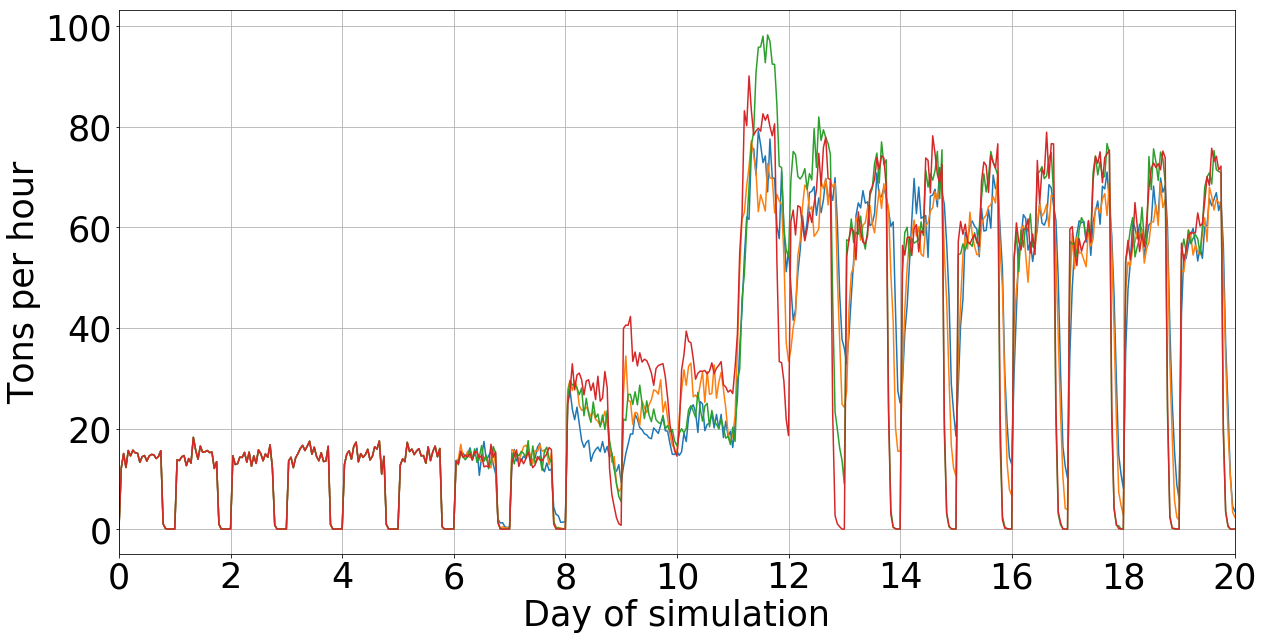

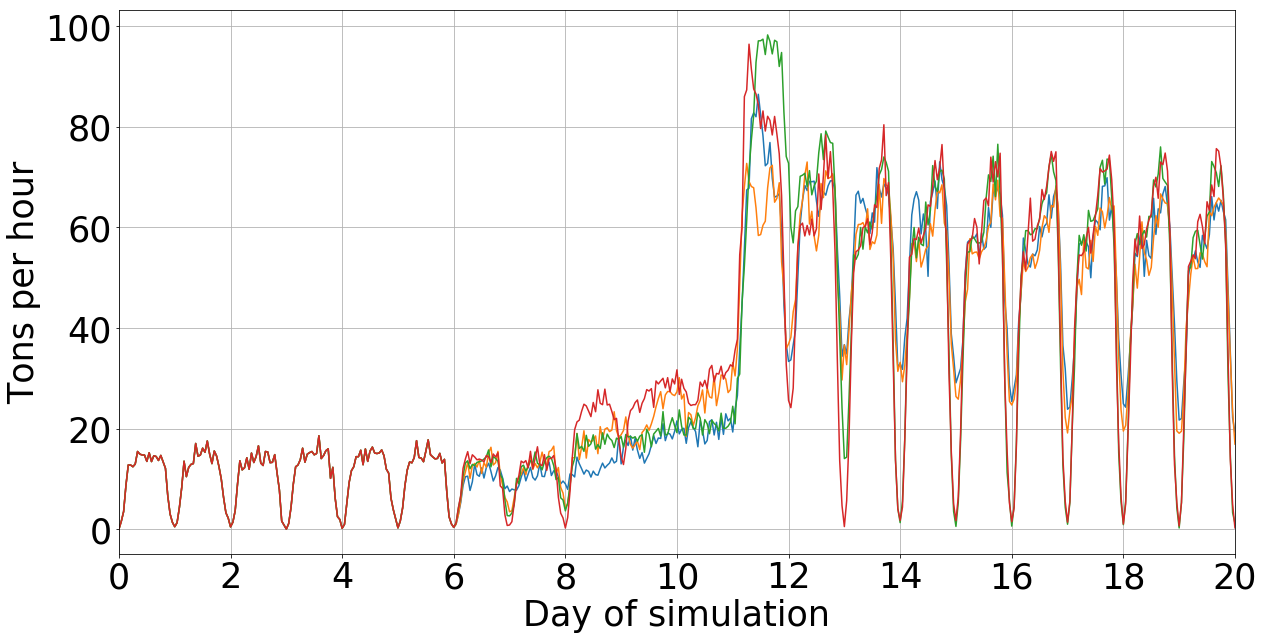

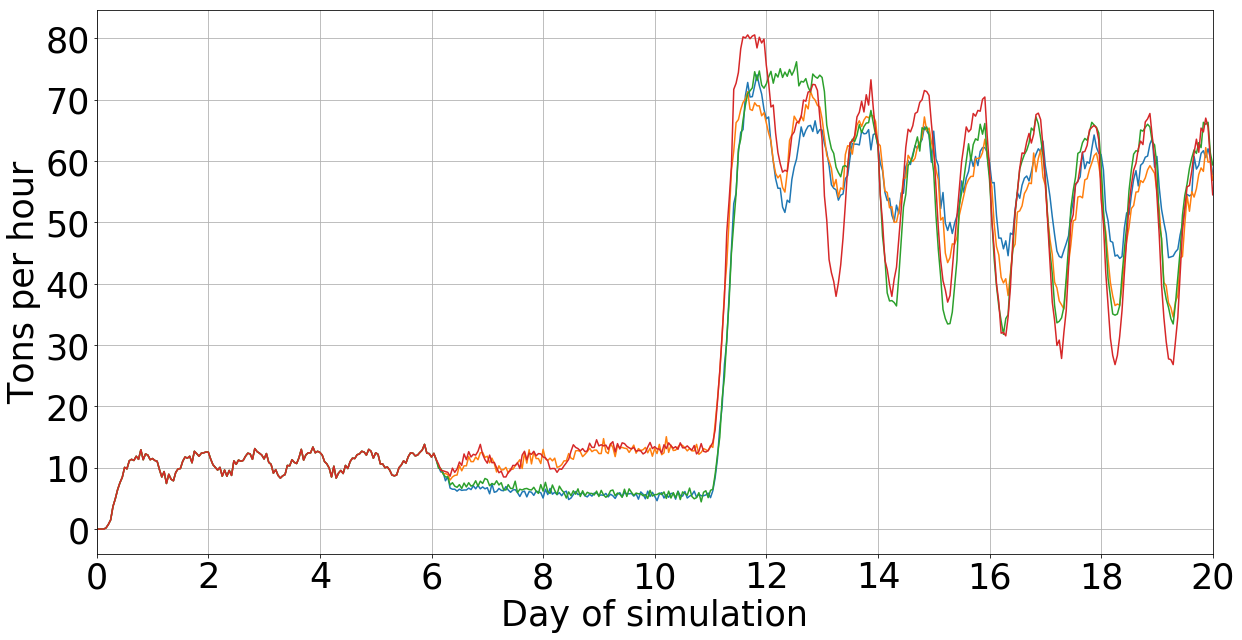

In [474]:
#processed
plot_proc_dock=df_final2.plot(grid=True, fontsize = 35 , legend= False, x="Time", y=['dockselection_processed_dic80_30_30','dockselection_processed_dic80_30_0', "dockselection_processed_dic80_0_30", "dockselection_processed_dic80_0_0"] ,  xticks=np.arange(0, 21, 2.0), figsize=(20,10))
plot_proc_dock.set_xlabel("Day of simulation", fontsize=35)
plot_proc_dock.set_ylabel("Tons per hour", fontsize=35)
fig=plot_proc_dock.get_figure()
fig.savefig("Results/Plots/"+alternative+"_processed_by_taxilane", bbox_inches='tight')
print("dockselection_processed_dic80_30_30 = " + str(df_final2["dockselection_processed_dic80_30_30"].sum(axis=0)))
print("dockselection_processed_dic80_30_0 = " + str(df_final2["dockselection_processed_dic80_30_0"].sum(axis=0)))
print("dockselection_processed_dic80_0_30 = " + str(df_final2["dockselection_processed_dic80_0_30"].sum(axis=0)))
print("dockselection_processed_dic80_0_0 = " + str(df_final2["dockselection_processed_dic80_0_0"].sum(axis=0)))

plot_proc_unload=df_final2.plot(grid=True, fontsize = 35, legend= False, x="Time", y=['unloading_processed_dic80_30_30','unloading_processed_dic80_30_0', "unloading_processed_dic80_0_30", "unloading_processed_dic80_0_0"], xticks=np.arange(0, 21, 2.0), figsize=(20,10))
plot_proc_unload.set_xlabel("Day of simulation", fontsize=35)
plot_proc_unload.set_ylabel("Tons per hour", fontsize=35)
fig=plot_proc_unload.get_figure()
fig.savefig("Results/Plots/"+alternative+"_processed_at_unloading", bbox_inches='tight')
print("unloading_processed_dic80_30_30 = " + str(df_final2["unloading_processed_dic80_30_30"].sum(axis=0)))
print("unloading_processed_dic80_30_0 = " + str(df_final2["unloading_processed_dic80_30_0"].sum(axis=0)))
print("unloading_processed_dic80_0_30 = " + str(df_final2["unloading_processed_dic80_0_30"].sum(axis=0)))
print("unloading_processed_dic80_0_0 = " + str(df_final2["unloading_processed_dic80_0_0"].sum(axis=0)))

plot_proc_ware=df_final2.plot(grid=True, fontsize = 35, legend= False, x="Time", y=['warehouse_processed_dic80_30_30','warehouse_processed_dic80_30_0', 'warehouse_processed_dic80_0_30', 'warehouse_processed_dic80_0_0'], xticks=np.arange(0, 21, 2.0), figsize=(20,10))
plot_proc_ware.set_xlabel("Day of simulation", fontsize=35)
plot_proc_ware.set_ylabel("Tons per hour", fontsize=35)
fig=plot_proc_ware.get_figure()
fig.savefig("Results/Plots/"+alternative+"_processed_at_warehouse", bbox_inches='tight')
print("warehouse_processed_dic80_30_30 = " + str(df_final2["warehouse_processed_dic80_30_30"].sum(axis=0)))
print("warehouse_processed_dic80_30_0 = " + str(df_final2["warehouse_processed_dic80_30_0"].sum(axis=0)))
print("warehouse_processed_dic80_0_30 = " + str(df_final2["warehouse_processed_dic80_0_30"].sum(axis=0)))
print("warehouse_processed_dic80_0_0 = " + str(df_final2["warehouse_processed_dic80_0_0"].sum(axis=0)))

In [475]:
df_final2["warehouse_processed_dic80_30_30"][226:288].idxmax()

284

In [501]:
df_final2["unloading_processed_dic80_30_30"][1:480].max()

86.5

In [504]:
df_final2["unloading_processed_dic80_30_30"][336:480].mean()

52.404079861111114

In [503]:
df_final2["unloading_processed_dic80_30_30"][144:240].mean()

12.1044921875

In [479]:
f= open("Results/Plots/"+alternative+"_processed.txt","w+")
f.write("dockselection_processed_dic80_30_30 = " + str(df_final2["dockselection_processed_dic80_30_30"].sum(axis=0))+"\n")
f.write("dockselection_processed_dic80_30_0 = " + str(df_final2["dockselection_processed_dic80_30_0"].sum(axis=0))+"\n")
f.write("dockselection_processed_dic80_0_30 = " + str(df_final2["dockselection_processed_dic80_0_30"].sum(axis=0))+"\n")
f.write("dockselection_processed_dic80_0_0 = " + str(df_final2["dockselection_processed_dic80_0_0"].sum(axis=0))+"\n")
        
f.write("unloading_processed_dic80_30_30 = " + str(df_final2["unloading_processed_dic80_30_30"].sum(axis=0))+"\n")
f.write("unloading_processed_dic80_30_0 = " + str(df_final2["unloading_processed_dic80_30_0"].sum(axis=0))+"\n")
f.write("unloading_processed_dic80_0_30 = " + str(df_final2["unloading_processed_dic80_0_30"].sum(axis=0))+"\n")
f.write("unloading_processed_dic80_0_0 = " + str(df_final2["unloading_processed_dic80_0_0"].sum(axis=0))+"\n")

f.write("warehouse_processed_dic80_30_30 = " + str(df_final2["warehouse_processed_dic80_30_30"].sum(axis=0))+"\n")
f.write("warehouse_processed_dic80_30_0 = " + str(df_final2["warehouse_processed_dic80_30_0"].sum(axis=0))+"\n")
f.write("warehouse_processed_dic80_0_30 = " + str(df_final2["warehouse_processed_dic80_0_30"].sum(axis=0))+"\n")
f.write("warehouse_processed_dic80_0_0 = " + str(df_final2["warehouse_processed_dic80_0_0"].sum(axis=0))+"\n")
f.close()

Time_average_taxi_dic80_30_30 = 7.305421260217552
Time_average_taxi_dic80_30_0 = 3.9680966452749558
Time_average_taxi_dic80_0_30 = 2.2900381960728016
Time_average_taxi_dic80_0_0 = 1.1053999546743183
Time_average_unloading_dic80_30_30 = 2.9247282873329796
Time_average_unloading_dic80_30_0 = 2.183682025056245
Time_average_unloading_dic80_0_30 = 2.183682025056245
Time_average_unloading_dic80_0_0 = 1.8474971030854388
Time_average_warehouse_dic80_30_30 = 2.7931538557074647
Time_average_warehouse_dic80_30_0 = 1.8598955758326863
Time_average_warehouse_dic80_0_30 = 2.3773045800480883
Time_average_warehouse_dic80_0_0 = 1.6582947945619024


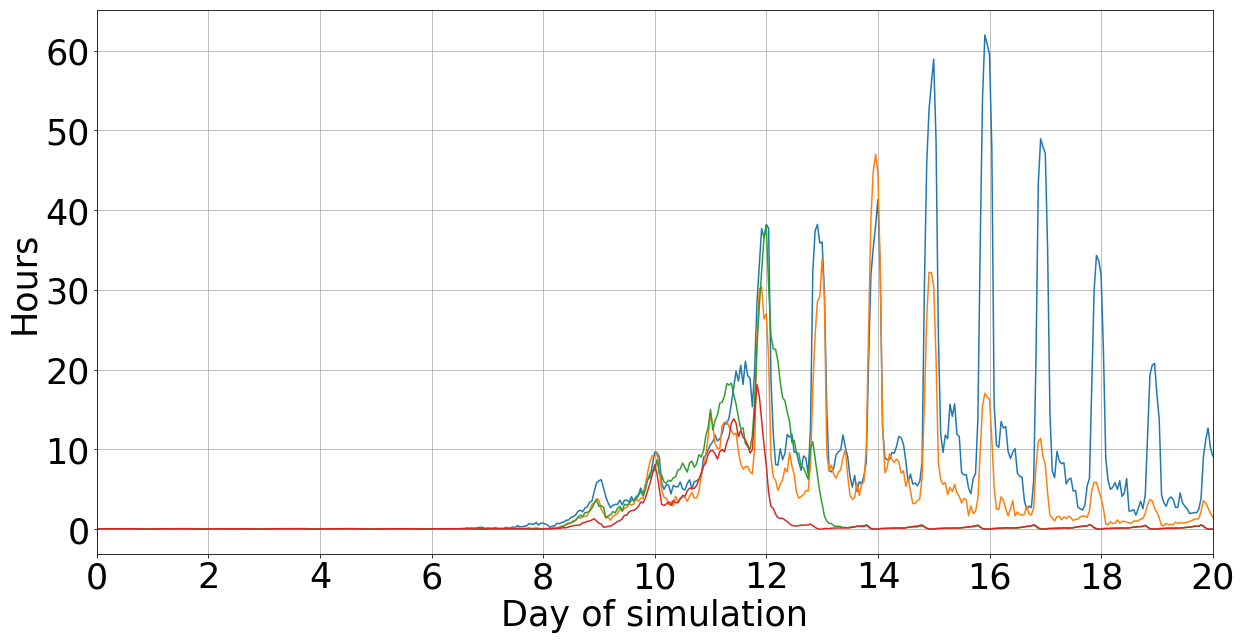

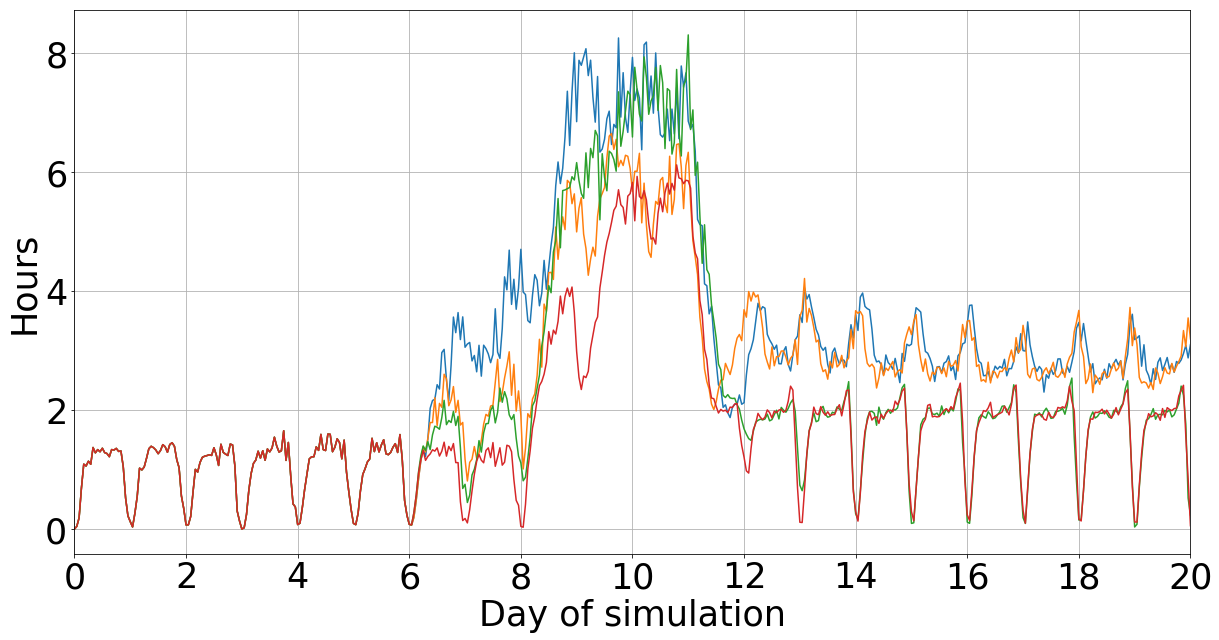

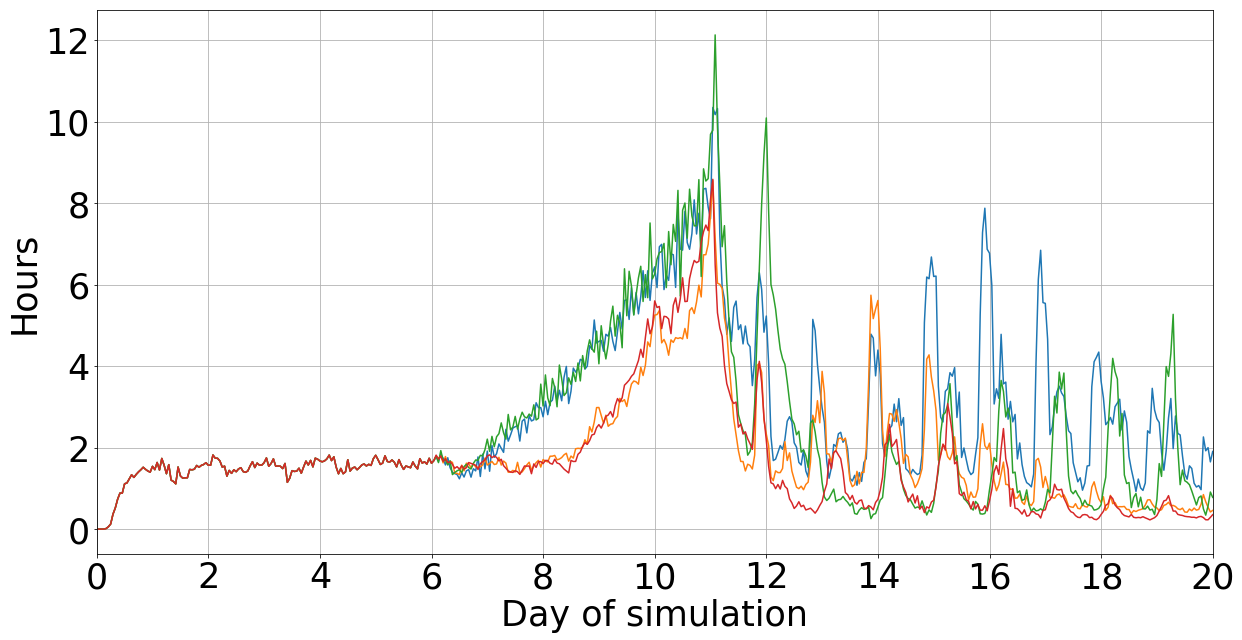

In [480]:
#throughput times
plot_time_dock=df_final2.plot(grid=True, fontsize = 35, legend= False, x="Time", y=['Time_average_taxi_dic80_30_30','Time_average_taxi_dic80_30_0', 'Time_average_taxi_dic80_0_30', 'Time_average_taxi_dic80_0_0'], xticks=np.arange(0, 21, 2.0), figsize=(20,10))
plot_time_dock.set_xlabel("Day of simulation", fontsize=35)
plot_time_dock.set_ylabel("Hours", fontsize=35)
fig=plot_time_dock.get_figure()
fig.savefig("Results/Plots/"+alternative+"_taxi_time", bbox_inches='tight')
print("Time_average_taxi_dic80_30_30 = " + str(df_final2["Time_average_taxi_dic80_30_30"].mean(axis=0)))
print("Time_average_taxi_dic80_30_0 = " + str(df_final2["Time_average_taxi_dic80_30_0"].mean(axis=0)))
print("Time_average_taxi_dic80_0_30 = " + str(df_final2["Time_average_taxi_dic80_0_30"].mean(axis=0)))
print("Time_average_taxi_dic80_0_0 = " + str(df_final2["Time_average_taxi_dic80_0_0"].mean(axis=0)))

plot_time_unloading=df_final2.plot(grid=True, fontsize = 35, legend= False, x="Time", y=['Time_average_unloading_dic80_30_30','Time_average_unloading_dic80_30_0', 'Time_average_unloading_dic80_0_30', 'Time_average_unloading_dic80_0_0'], xticks=np.arange(0, 21, 2.0), figsize=(20,10))
plot_time_unloading.set_xlabel("Day of simulation", fontsize=35)
plot_time_unloading.set_ylabel("Hours", fontsize=35)
fig=plot_time_unloading.get_figure()
fig.savefig("Results/Plots/"+alternative+"_unloading_time", bbox_inches='tight')
print("Time_average_unloading_dic80_30_30 = " + str(df_final2["Time_average_unloading_dic80_30_30"].mean(axis=0)))
print("Time_average_unloading_dic80_30_0 = " + str(df_final2["Time_average_unloading_dic80_0_30"].mean(axis=0)))
print("Time_average_unloading_dic80_0_30 = " + str(df_final2["Time_average_unloading_dic80_0_30"].mean(axis=0)))
print("Time_average_unloading_dic80_0_0 = " + str(df_final2["Time_average_unloading_dic80_0_0"].mean(axis=0)))

plot_time_warehouse=df_final2.plot(grid=True, fontsize = 35, legend= False, x="Time", y=['Time_average_warehouse_dic80_30_30','Time_average_warehouse_dic80_30_0', 'Time_average_warehouse_dic80_0_30', 'Time_average_warehouse_dic80_0_0'], xticks=np.arange(0, 21, 2.0), figsize=(20,10))
plot_time_warehouse.set_xlabel("Day of simulation", fontsize=35)
plot_time_warehouse.set_ylabel("Hours", fontsize=35)
fig=plot_time_warehouse.get_figure()
fig.savefig("Results/Plots/"+alternative+"_warehouse_time", bbox_inches='tight')
print("Time_average_warehouse_dic80_30_30 = " + str(df_final2["Time_average_warehouse_dic80_30_30"].mean(axis=0)))
print("Time_average_warehouse_dic80_30_0 = " + str(df_final2["Time_average_warehouse_dic80_30_0"].mean(axis=0)))
print("Time_average_warehouse_dic80_0_30 = " + str(df_final2["Time_average_warehouse_dic80_0_30"].mean(axis=0)))
print("Time_average_warehouse_dic80_0_0 = " + str(df_final2["Time_average_warehouse_dic80_0_0"].mean(axis=0)))

In [507]:
df_final2["Time_average_taxi_dic80_30_30"][226:288].idxmax()

286

In [522]:
df_final2["Time_average_warehouse_dic80_30_30"][1:480].max()

10.348006506828979

In [525]:
df_final2["Time_average_warehouse_dic80_30_30"][432:480].mean()

2.1002391208099356

In [524]:
df_final2["Time_average_warehouse_dic80_30_30"][1:144].mean()

1.433243986276648

average_TIS_dic80_30_30 = 19.317664965683438
average_TIS_dic80_30_0 = 14.967132791953942
average_TIS_dic80_0_30 = 17.500021633486625
average_TIS_dic80_0_0 = 14.1937986317724


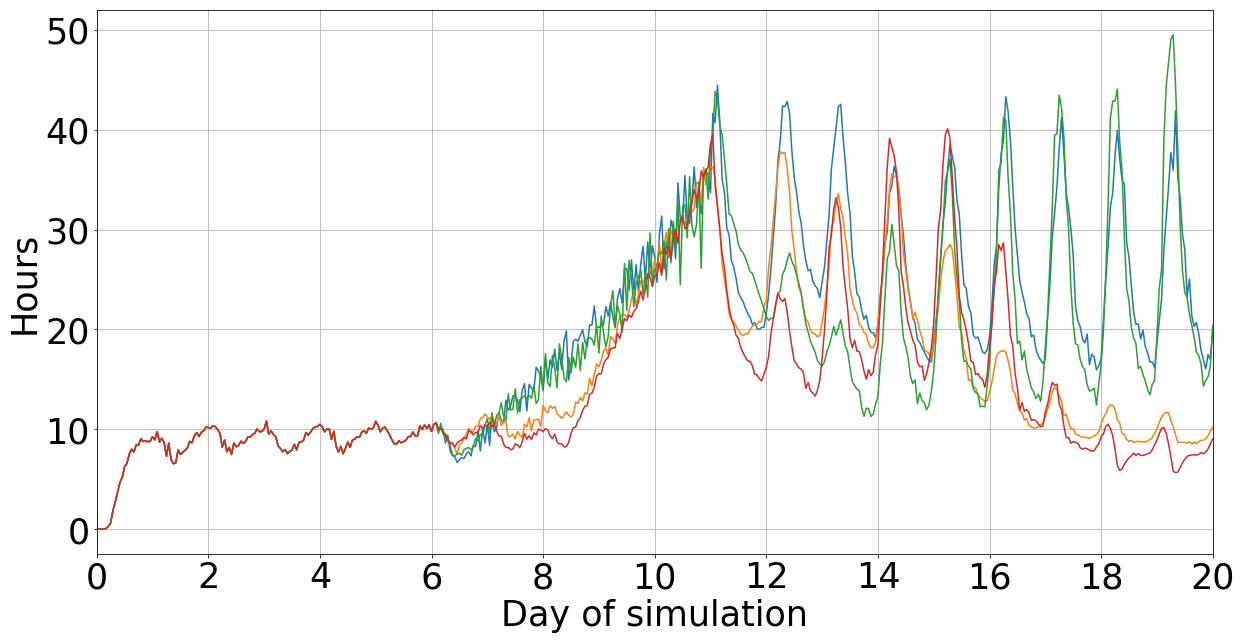

In [485]:
#throughput total
plot_time_total=df_final2.plot(grid=True, fontsize = 35, legend= False, x="Time", y=['average_TIS_dic80_30_30','average_TIS_dic80_30_0', "average_TIS_dic80_0_30", "average_TIS_dic80_0_0" ], xticks=np.arange(0, 21, 2.0), figsize=(20,10))
plot_time_total.set_xlabel("Day of simulation", fontsize=35)
plot_time_total.set_ylabel("Hours", fontsize=35)
fig=plot_time_total.get_figure()
fig.savefig("Results/Plots/"+alternative+"_average_TIS", bbox_inches='tight')
print("average_TIS_dic80_30_30 = " + str(df_final2["average_TIS_dic80_30_30"].mean(axis=0)))
print("average_TIS_dic80_30_0 = " + str(df_final2["average_TIS_dic80_30_0"].mean(axis=0)))
print("average_TIS_dic80_0_30 = " + str(df_final2["average_TIS_dic80_0_30"].mean(axis=0)))
print("average_TIS_dic80_0_0 = " + str(df_final2["average_TIS_dic80_0_0"].mean(axis=0)))

In [486]:
f= open("Results/Plots/"+alternative+"Time.txt","w+")
f.write("Time_average_taxi_dic80_30_30 = " + str(df_final2["Time_average_taxi_dic80_30_30"].mean(axis=0))+"\n")
f.write("Time_average_taxi_dic80_30_0 = " + str(df_final2["Time_average_taxi_dic80_30_0"].mean(axis=0))+"\n")
f.write("Time_average_taxi_dic80_0_30 = " + str(df_final2["Time_average_taxi_dic80_0_30"].mean(axis=0))+"\n")
f.write("Time_average_taxi_dic80_0_0 = " + str(df_final2["Time_average_taxi_dic80_0_0"].mean(axis=0))+"\n")
        
f.write("Time_average_unloading_dic80_30_30 = " + str(df_final2["Time_average_unloading_dic80_30_30"].mean(axis=0))+"\n")
f.write("Time_average_unloading_dic80_30_0 = " + str(df_final2["Time_average_unloading_dic80_0_30"].mean(axis=0))+"\n")
f.write("Time_average_unloading_dic80_0_30 = " + str(df_final2["Time_average_unloading_dic80_0_30"].mean(axis=0))+"\n")
f.write("Time_average_unloading_dic80_0_0 = " + str(df_final2["Time_average_unloading_dic80_0_0"].mean(axis=0))+"\n")

f.write("Time_average_warehouse_dic80_30_30 = " + str(df_final2["Time_average_warehouse_dic80_30_30"].mean(axis=0))+"\n")
f.write("Time_average_warehouse_dic80_30_0 = " + str(df_final2["Time_average_warehouse_dic80_30_0"].mean(axis=0))+"\n")
f.write("Time_average_warehouse_dic80_0_30 = " + str(df_final2["Time_average_warehouse_dic80_0_30"].mean(axis=0))+"\n")
f.write("Time_average_warehouse_dic80_0_0 = " + str(df_final2["Time_average_warehouse_dic80_0_0"].mean(axis=0))+"\n")

f.write("average_TIS_dic80_30_30 = " + str(df_final2["average_TIS_dic80_30_30"].mean(axis=0))+"\n")
f.write("average_TIS_dic80_30_0 = " + str(df_final2["average_TIS_dic80_30_0"].mean(axis=0))+"\n")
f.write("average_TIS_dic80_0_30 = " + str(df_final2["average_TIS_dic80_0_30"].mean(axis=0))+"\n")
f.write("average_TIS_dic80_0_0 = " + str(df_final2["average_TIS_dic80_0_0"].mean(axis=0))+"\n")
f.close()

In [487]:
#df_final2["average_TIS_dic80_30_30"][400:480].mean()
df_final2["average_TIS_dic80_30_30"].idxmax()
#df_final2["average_TIS_dic80_30_30"].max()

267

cargo_at_taxilane_dic80_30_30 = 255.91339656964658
cargo_at_taxilane_dic80_30_0 = 136.72576663201664
cargo_at_taxilane_dic80_0_30 = 97.20205301455302
cargo_at_taxilane_dic80_0_0 = 42.055613305613306
cargo_at_dolly_unloading_dic80_30_30 = 2.6747985966735968
cargo_at_dolly_unloading_dic80_30_0 = 2.0562954781704783
cargo_at_dolly_unloading_dic80_0_30 = 2.6251299376299375
cargo_at_dolly_unloading_dic80_0_0 = 1.946498180873181
cargo_at_warehouse_dic80_30_30 = 590.9071270790021
cargo_at_warehouse_dic80_30_0 = 284.3789955821206
cargo_at_warehouse_dic80_0_30 = 677.7054963617463
cargo_at_warehouse_dic80_0_0 = 356.2784888253638


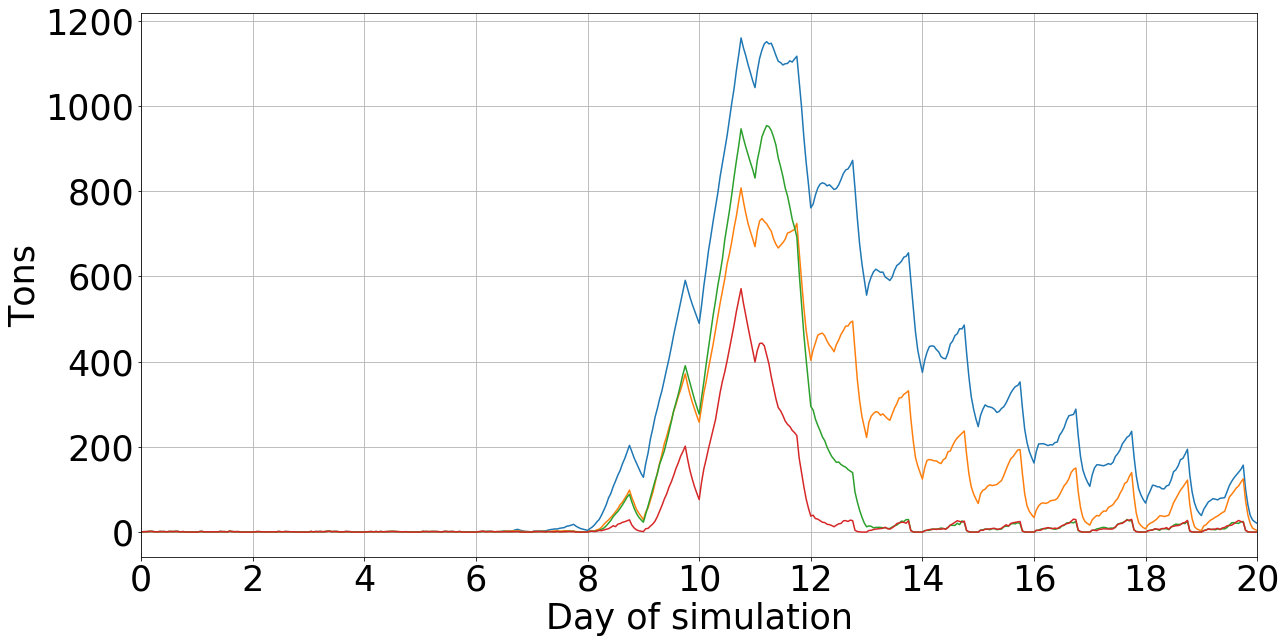

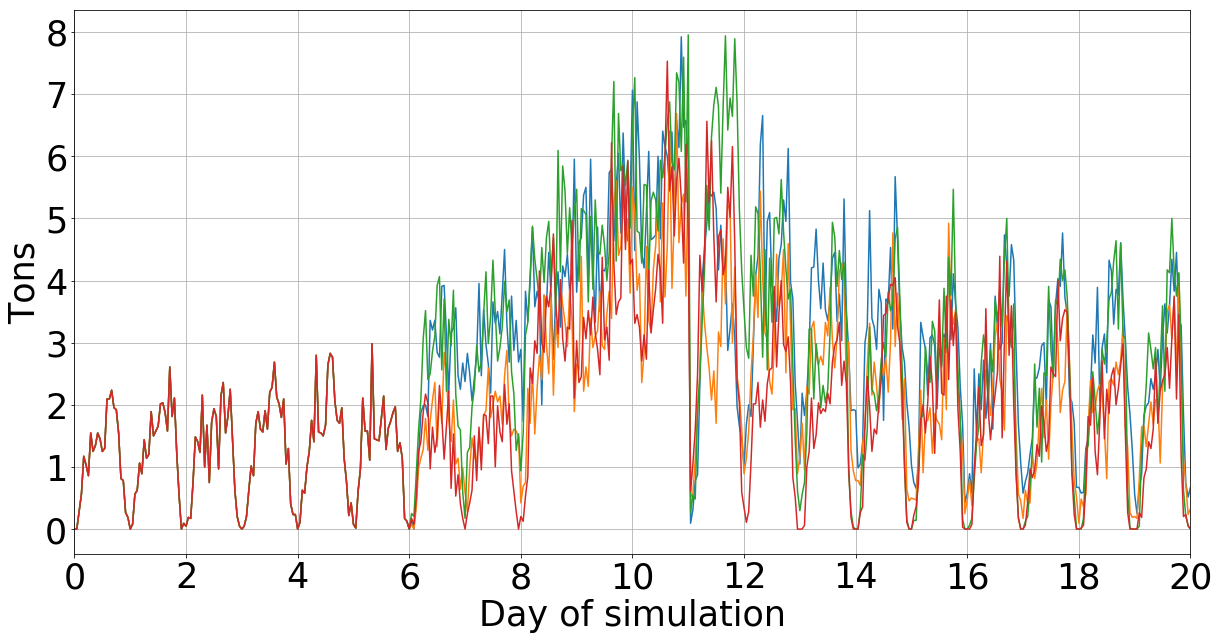

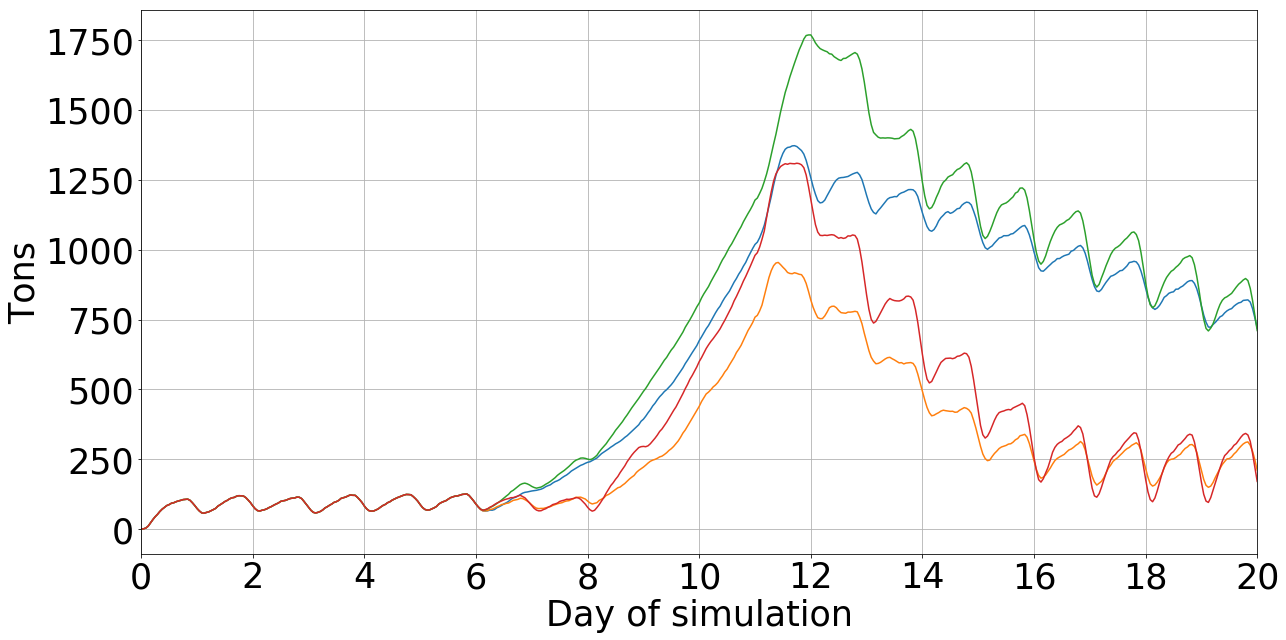

In [488]:
#idle

plot_idle_dock=df_final2.plot(grid=True, fontsize = 35, legend= False, x="Time", y=['cargo_at_taxilane_dic80_30_30','cargo_at_taxilane_dic80_30_0', "cargo_at_taxilane_dic80_0_30", "cargo_at_taxilane_dic80_0_0"], xticks=np.arange(0, 21, 2.0), figsize=(20,10))
plot_idle_dock.set_xlabel("Day of simulation", fontsize=35)
plot_idle_dock.set_ylabel("Tons", fontsize=35)
fig=plot_idle_dock.get_figure()
fig.savefig("Results/Plots/"+alternative+"_idle_at_taxilane", bbox_inches='tight')
print("cargo_at_taxilane_dic80_30_30 = " + str(df_final2["cargo_at_taxilane_dic80_30_30"].mean(axis=0)))
print("cargo_at_taxilane_dic80_30_0 = " + str(df_final2["cargo_at_taxilane_dic80_30_0"].mean(axis=0)))
print("cargo_at_taxilane_dic80_0_30 = " + str(df_final2["cargo_at_taxilane_dic80_0_30"].mean(axis=0)))
print("cargo_at_taxilane_dic80_0_0 = " + str(df_final2["cargo_at_taxilane_dic80_0_0"].mean(axis=0)))

plot_idle_unloading=df_final2.plot(grid=True, fontsize = 35, legend= False, x="Time", y=['cargo_at_dolly_unloading_dic80_30_30','cargo_at_dolly_unloading_dic80_30_0', 'cargo_at_dolly_unloading_dic80_0_30', 'cargo_at_dolly_unloading_dic80_0_0'], xticks=np.arange(0, 21, 2.0), figsize=(20,10))
plot_idle_unloading.set_xlabel("Day of simulation", fontsize=35)
plot_idle_unloading.set_ylabel("Tons", fontsize=35)
fig=plot_idle_unloading.get_figure()
fig.savefig("Results/Plots/"+alternative+"_idle_at_unloading", bbox_inches='tight')
print("cargo_at_dolly_unloading_dic80_30_30 = " + str(df_final2["cargo_at_dolly_unloading_dic80_30_30"].mean(axis=0)))
print("cargo_at_dolly_unloading_dic80_30_0 = " + str(df_final2["cargo_at_dolly_unloading_dic80_30_0"].mean(axis=0)))
print("cargo_at_dolly_unloading_dic80_0_30 = " + str(df_final2["cargo_at_dolly_unloading_dic80_0_30"].mean(axis=0)))
print("cargo_at_dolly_unloading_dic80_0_0 = " + str(df_final2["cargo_at_dolly_unloading_dic80_0_0"].mean(axis=0)))

plot_idle_warehouse=df_final2.plot(grid=True, fontsize = 35, legend= False, x="Time", y=['cargo_at_warehouse_dic80_30_30','cargo_at_warehouse_dic80_30_0', 'cargo_at_warehouse_dic80_0_30', 'cargo_at_warehouse_dic80_0_0'], xticks=np.arange(0, 21, 2.0), figsize=(20,10))
plot_idle_warehouse.set_xlabel("Day of simulation", fontsize=35)
plot_idle_warehouse.set_ylabel("Tons", fontsize=35)
fig=plot_idle_warehouse.get_figure()
fig.savefig("Results/Plots/"+alternative+"_idle_at_warehouse", bbox_inches='tight')
print("cargo_at_warehouse_dic80_30_30 = " + str(df_final2["cargo_at_warehouse_dic80_30_30"].mean(axis=0)))
print("cargo_at_warehouse_dic80_30_0 = " + str(df_final2["cargo_at_warehouse_dic80_30_0"].mean(axis=0)))
print("cargo_at_warehouse_dic80_0_30 = " + str(df_final2["cargo_at_warehouse_dic80_0_30"].mean(axis=0)))
print("cargo_at_warehouse_dic80_0_0 = " + str(df_final2["cargo_at_warehouse_dic80_0_0"].mean(axis=0)))

In [489]:
#df_final2["cargo_at_taxilane_dic80_30_30"][384:480].mean()
df_final2["cargo_at_warehouse_dic80_30_30"][1:480].max()

1372.3125

In [490]:
df_final2["cargo_at_dolly_unloading_dic80_30_30"][226:288].idxmax()

261

In [491]:
df_final2["cargo_at_dolly_unloading_dic80_30_30"][1:480].max()

7.921875

In [505]:
df_final2["cargo_at_dolly_unloading_dic80_30_30"][336:480].mean()

2.6106770833333335

In [493]:
df_final2["cargo_at_dolly_unloading_dic80_30_30"][1:144].mean()

1.2869318181818181

total_idle80_30_30 = 849.4953222453222
total_idle80_30_0 = 423.1610576923077
total_idle80_0_30 = 777.5326793139293
total_idle80_0_0 = 400.2806003118503


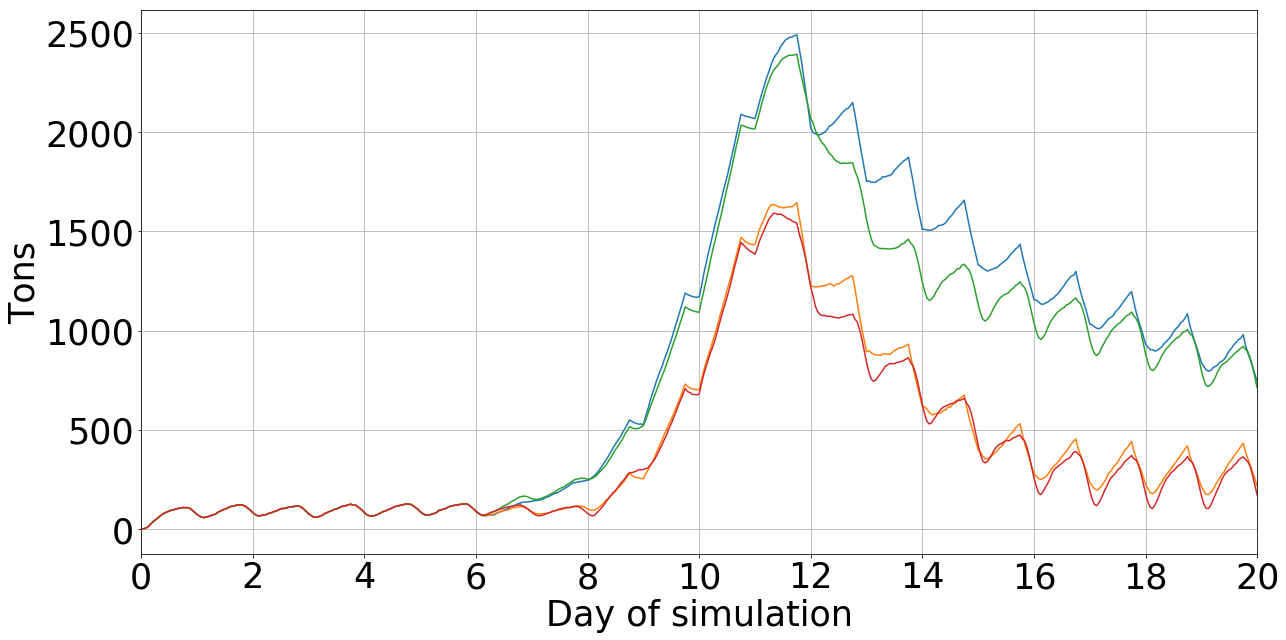

In [494]:
## total idle
df_total_idle=pd.DataFrame()
df_total_idle["Time_dic80_30_30"]=df_final2["Time_dic80_30_30"]
df_total_idle["Time"]=df_final2['Time_dic80_30_30']/24

df_total_idle["total_idle80_30_30"]=df_final2["cargo_at_taxilane_dic80_30_30"]+df_final2["cargo_at_dolly_unloading_dic80_30_30"]+df_final2["cargo_at_warehouse_dic80_30_30"]
df_total_idle["total_idle80_30_0"]=df_final2["cargo_at_taxilane_dic80_30_0"]+df_final2["cargo_at_dolly_unloading_dic80_30_0"]+df_final2["cargo_at_warehouse_dic80_30_0"]
df_total_idle["total_idle80_0_30"]=df_final2["cargo_at_taxilane_dic80_0_30"]+df_final2["cargo_at_dolly_unloading_dic80_0_30"]+df_final2["cargo_at_warehouse_dic80_0_30"]
df_total_idle["total_idle80_0_0"]=df_final2["cargo_at_taxilane_dic80_0_0"]+df_final2["cargo_at_dolly_unloading_dic80_0_0"]+df_final2["cargo_at_warehouse_dic80_0_0"]

plot_idle_total=df_total_idle.plot(grid=True, fontsize = 35, legend= False, x="Time", y=['total_idle80_30_30','total_idle80_30_0', 'total_idle80_0_30', 'total_idle80_0_0'], xticks=np.arange(0, 21, 2), figsize=(20,10))
plot_idle_total.set_xlabel("Day of simulation", fontsize=35)
plot_idle_total.set_ylabel("Tons", fontsize=35)
fig=plot_idle_total.get_figure()
fig.savefig("Results/Plots/"+alternative+"_idle_total", bbox_inches='tight')
print("total_idle80_30_30 = " + str(df_total_idle["total_idle80_30_30"].mean(axis=0)))
print("total_idle80_30_0 = " + str(df_total_idle["total_idle80_30_0"].mean(axis=0)))
print("total_idle80_0_30 = " + str(df_total_idle["total_idle80_0_30"].mean(axis=0)))
print("total_idle80_0_0 = " + str(df_total_idle["total_idle80_0_0"].mean(axis=0)))

In [495]:
df_total_idle["total_idle80_30_30"][432:480].mean()
#df_total_idle["total_idle80_30_30"].idxmax()
#df_total_idle["total_idle80_30_30"].max()

914.2076822916666

In [496]:
f= open("Results/Plots/"+alternative+"idle.txt","w+")
f.write("cargo_at_taxilane_dic80_30_30 = " + str(df_final2["cargo_at_taxilane_dic80_30_30"].mean(axis=0))+"\n")
f.write("cargo_at_taxilane_dic80_30_0 = " + str(df_final2["cargo_at_taxilane_dic80_30_0"].mean(axis=0))+"\n")
f.write("cargo_at_taxilane_dic80_0_30 = " + str(df_final2["cargo_at_taxilane_dic80_0_30"].mean(axis=0))+"\n")
f.write("cargo_at_taxilane_dic80_0_0 = " + str(df_final2["cargo_at_taxilane_dic80_0_0"].mean(axis=0))+"\n")
        
f.write("cargo_at_dolly_unloading_dic80_30_30 = " + str(df_final2["cargo_at_dolly_unloading_dic80_30_30"].mean(axis=0))+"\n")
f.write("cargo_at_dolly_unloading_dic80_30_0 = " + str(df_final2["cargo_at_dolly_unloading_dic80_30_0"].mean(axis=0))+"\n")
f.write("cargo_at_dolly_unloading_dic80_0_30 = " + str(df_final2["cargo_at_dolly_unloading_dic80_0_30"].mean(axis=0))+"\n")
f.write("cargo_at_dolly_unloading_dic80_0_0 = " + str(df_final2["cargo_at_dolly_unloading_dic80_0_0"].mean(axis=0))+"\n")

f.write("cargo_at_warehouse_dic80_30_30 = " + str(df_final2["cargo_at_warehouse_dic80_30_30"].mean(axis=0))+"\n")
f.write("cargo_at_warehouse_dic80_30_0 = " + str(df_final2["cargo_at_warehouse_dic80_30_0"].mean(axis=0))+"\n")
f.write("cargo_at_warehouse_dic80_0_30 = " + str(df_final2["cargo_at_warehouse_dic80_0_30"].mean(axis=0))+"\n")
f.write("cargo_at_warehouse_dic80_0_0 = " + str(df_final2["cargo_at_warehouse_dic80_0_0"].mean(axis=0))+"\n")

f.write("total_idle80_30_30 = " + str(df_total_idle["total_idle80_30_30"].mean(axis=0))+"\n")
f.write("total_idle80_30_0 = " + str(df_total_idle["total_idle80_30_0"].mean(axis=0))+"\n")
f.write("total_idle80_0_30 = " + str(df_total_idle["total_idle80_0_30"].mean(axis=0))+"\n")
f.write("total_idle80_0_0 = " + str(df_total_idle["total_idle80_0_0"].mean(axis=0))+"\n")
f.close()

In [497]:
print("DONE")

DONE
